In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn

In [3]:
u_1 = np.array([2, 2])
u_2 = np.array([-5, -3])

In [4]:
cov_1 = np.array([[0.5, 1], [1, 1]])
cov_2 = np.array([[1.5, 1], [2, 1]])

In [5]:
d1 = np.random.multivariate_normal(u_1, cov_1, 500)
d2 = np.random.multivariate_normal(u_2, cov_2, 500)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_2952\1073053494.py:1: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  d1 = np.random.multivariate_normal(u_1, cov_1, 500)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_2952\1073053494.py:2: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  d2 = np.random.multivariate_normal(u_2, cov_2, 500)


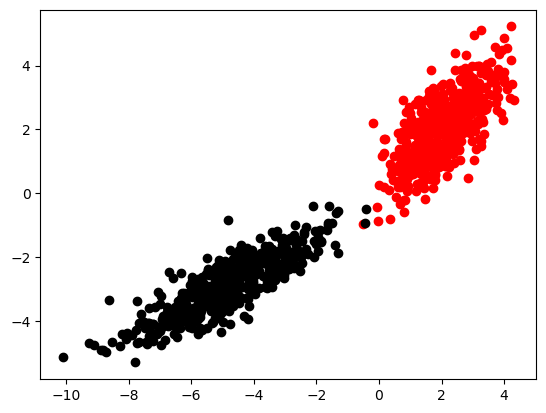

In [6]:
plt.scatter(d1[:, 0], d1[:, 1], color = 'red')  #0 dogs
plt.scatter(d2[:, 0], d2[:, 1], color = 'black') #1 cats

In [7]:
d1.shape

(500, 2)

In [8]:
d2.shape

(500, 2)

In [9]:
dataset = np.ones((1000, 4))

In [10]:
dataset.shape

(1000, 4)

In [11]:
dataset[:4]

array([[1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.]])

In [12]:
dataset[:500, 1:3] = d1

In [13]:
dataset[500:, 1:3] = d2

In [14]:
dataset[:4]

array([[1.        , 1.31833779, 1.35577404, 1.        ],
       [1.        , 1.49009573, 1.41178081, 1.        ],
       [1.        , 0.98171605, 0.79180883, 1.        ],
       [1.        , 0.17367387, 1.24764884, 1.        ]])

In [15]:
dataset[:500, -1] = 0

In [16]:
dataset[:4]

array([[1.        , 1.31833779, 1.35577404, 0.        ],
       [1.        , 1.49009573, 1.41178081, 0.        ],
       [1.        , 0.98171605, 0.79180883, 0.        ],
       [1.        , 0.17367387, 1.24764884, 0.        ]])

In [17]:
dataset[-4:]

array([[ 1.        , -4.19672059, -3.95511282,  1.        ],
       [ 1.        , -3.79564385, -1.41445601,  1.        ],
       [ 1.        , -2.99934023, -2.35344566,  1.        ],
       [ 1.        , -4.89042501, -3.53062683,  1.        ]])

In [18]:
x_train = dataset[:800,:-1]
y_train = dataset[:800, -1]
x_test = dataset[800:, :-1]
y_test = dataset[800:, -1]

In [19]:
print(x_train.shape,y_train.shape, x_test.shape, y_test.shape)

(800, 3) (800,) (200, 3) (200,)


In [20]:
y_train = y_train.reshape((-1, 1))

In [21]:
y_train.shape

(800, 1)

In [22]:
def sigmoid(x):
    return 1/(1 + np.exp(-x))

In [23]:
# def hypothesis(X, theta):
#     return sigmoid(np.dot(X, theta))

def hypothesis(X, theta):
    return 1/(1 + np.exp(np.dot(X, theta)))

In [24]:
def cost(X, Y, theta):
    
    y_p = hypothesis(X, theta)
    

    loss = -1*(np.mean(Y*np.log(y_p) + (1-Y)*np.log(1 - y_p)))
    
    return loss

In [25]:
def gradient(X, Y, theta):
    
    y_p = hypothesis(X, theta)
    
    grad = np.dot(X, (Y - y_p))
    
    return grad/X.shape[0]

In [26]:
def gradient_descent(X, Y, learning_rate = 0.3, epochs = 100):
    
    m,n = X.shape
    
    theta = np.zeros((n, 1))
    
    cost_epoch = []
    
    for i in range(epochs):
        
        print("Epochs no: ", i, end = '\r')
        
        loss = cost(X,Y, theta)
        
        grad = gradient(X, Y, theta)
        
        cost_epoch.append(loss)
        
        theta = theta + learning_rate*grad
        
    return theta, cost_epoch    
        

In [27]:
theta, cost = gradient_descent(x_train, y_train)

ValueError: shapes (800,3) and (800,1) not aligned: 3 (dim 1) != 800 (dim 0)

In [31]:
!pip install geopy phonenumbers

  Obtaining dependency information for geopy from https://files.pythonhosted.org/packages/e5/15/cf2a69ade4b194aa524ac75112d5caac37414b20a3a03e6865dfe0bd1539/geopy-2.4.1-py3-none-any.whl.metadata
  Obtaining dependency information for phonenumbers from https://files.pythonhosted.org/packages/c6/17/cccaee08b0eedf016b10ef8d3322595df46365959e38c3086eb38d719080/phonenumbers-8.13.32-py2.py3-none-any.whl.metadata
  Obtaining dependency information for geographiclib<3,>=1.52 from https://files.pythonhosted.org/packages/9f/5a/a26132406f1f40cf51ea349a5f11b0a46cec02a2031ff82e391c2537247a/geographiclib-2.0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/125.4 kB ? eta -:--:--
   --- ------------------------------------ 10.2/125.4 kB ? eta -:--:--
   ------------ -------------------------- 41.0/125.4 kB 495.5 kB/s eta 0:00:01
   ---------------------------------------- 125.4/125.4 kB 1.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.6 MB ? eta -:--:--


In [1]:
# import phonenumbers
# from phonenumbers import geocoder
# from geopy.geocoders import Nominatim

# def track_phone_number(phone_number):
#     try:
#         phone_number_parsed = phonenumbers.parse(phone_number)
#         if not phonenumbers.is_valid_number(phone_number_parsed):
#             return "Invalid phone number"

#         geolocator = Nominatim(user_agent="phone_tracker")
#         location = geolocator.geocode(geocoder.description_for_number(phone_number_parsed, "en"))

#         if location:
#             return f"The phone is likely in: {location.address}"
#         else:
#             return "Location not found"

#     except Exception as e:
#         return f"Error: {str(e)}"

# if __name__ == "__main__":
#     phone_number = input("Enter the phone number to track: ")
#     print(track_phone_number(phone_number))

In [39]:
import pyttsx3 
import speech_recognition as sr
import datetime 
import wikipedia 
import webbrowser
import os

# pyttsx3.speak('kshitij Raj shukla')
engine = pyttsx3.init('sapi5')
voices = engine.getProperty('voices')

engine.setProperty('voice', voices[1].id)

def speak(audio):
    engine.say(audio)
    engine.runAndWait()

def wishMe():
    hour = int(datetime.datetime.now().hour)

    if hour >= 0 and hour <12:
        speak('good morning my sir')
    
    elif hour >= 12 and hour<18:
        speak('good afternoon my sir')
    
    else:
        speak('good evening my sir')
    
    speak('how can i help you sir')


def takeCommand():
    r = sr.Recognizer()
    with sr.Microphone() as source:
        print('computing...')
        r.pause_threshold = 1
        audio = r.listen(source)

    try:
        print('recognizing...')
        query = r.recognize_google(audio, language = 'en-in')
        print(f'user said: \n{query}')
    
    except Exception as e:
        print('say that again sir...')
        return "None"
    return query


if __name__ == '__main__':
    wishMe()
    while True:
        query = takeCommand().lower()
        
        if 'wikipedia' in query:
            speak('searching in wikipedia...')
            query = query.replace('wikipedia'," ") 
            results = wikipedia.summary(query, sentences = 4)
            speak('according to wikipedia')
            print(results)
            speak(results)

        elif 'open youtube' in query:
            speak('searching for youtube...')
            webbrowser.open('http://www.youtube.com/watch')

        elif 'open google' in query:
            speak('searching for google...')
            webbrowser.open('http://www.google.com')
        elif 'open github' in query:
            speak('searching for github...')
            webbrowser.open('https://github.com/')
        elif 'stop' or 'go' or 'shut' or 'down' in query:
            os.exit(0)

        else:
            speak('these are the end of my capabilities, sir...')
            

computing...
recognizing...
user said: 
stop


AttributeError: module 'os' has no attribute 'exit'